## 1. Project Overview & Setup

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuration for clearer plots

In [15]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load Data

In [16]:
df = pd.read_csv('../data/raw/data.csv')


# Convert timestamps immediately for time-series analysis

In [17]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# 2. Overview of the Data

# Structure and Types

In [18]:
print(f"Dataset Shape: {df.shape}")
print(df.info())

Dataset Shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  fl

# Summary Statistics (Numerical)

In [19]:
display(df.describe())

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


# Summary Statistics (Categorical)

In [20]:
display(df.describe(include=['object']))

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935


# 3. Distribution of Numerical Features

# Visualizing skewness and range to inform scaling strategies.

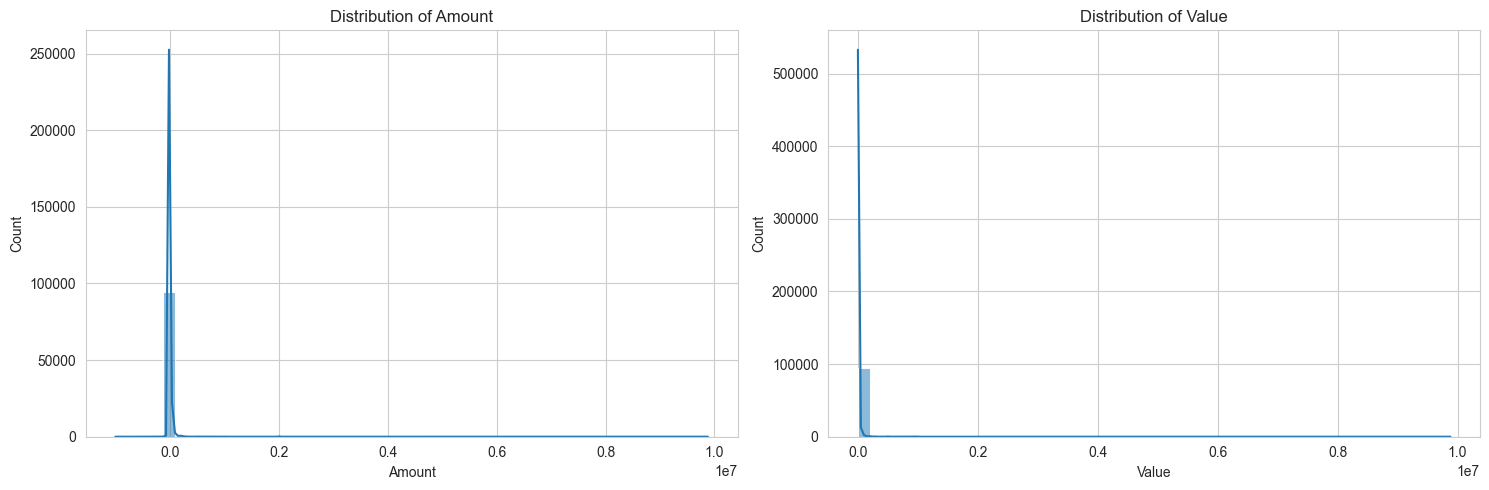

In [21]:
numerical_cols = ['Amount', 'Value']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Check for skewness

In [22]:
print(f"Skewness of Amount: {df['Amount'].skew()}")

Skewness of Amount: 51.098489522819115


# 4. Distribution of Categorical Features

C:\Users\mulat\AppData\Local\Temp\ipykernel_23696\3282895341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


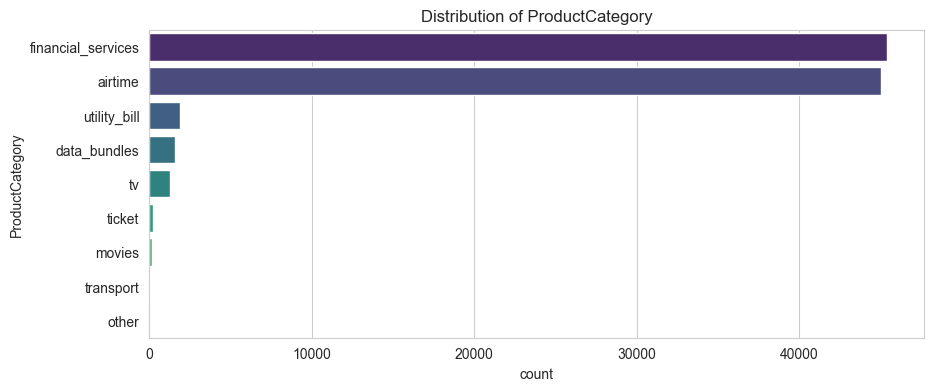

C:\Users\mulat\AppData\Local\Temp\ipykernel_23696\3282895341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


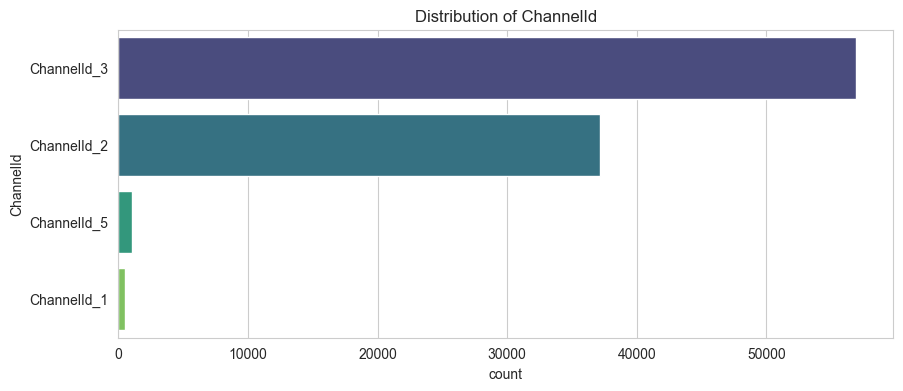

C:\Users\mulat\AppData\Local\Temp\ipykernel_23696\3282895341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


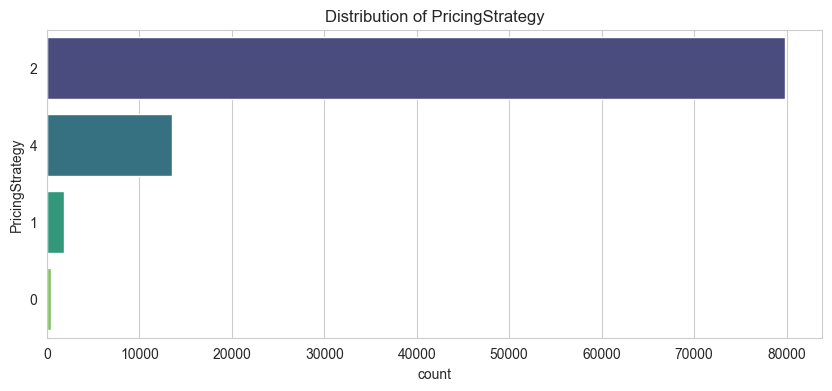

In [23]:
categorical_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. Correlation Analysis

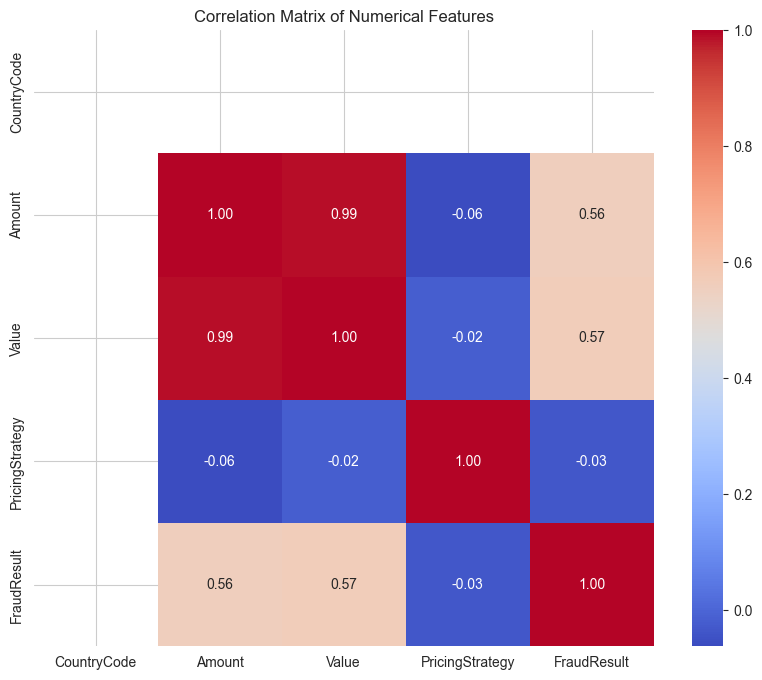

In [24]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Identifying Missing Values & Imputation Strategy

# Calculate missing percentage

In [25]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
display(missing_df[missing_df['Percentage'] > 0])

,Missing Count,Percentage


# Visualize missingness

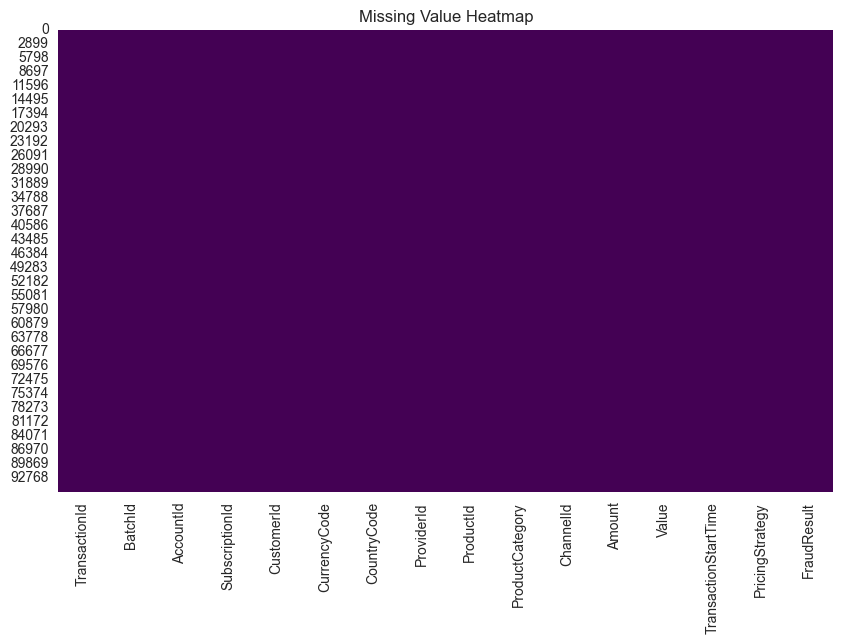

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# 7. Outlier Detection

# Identifying anomalies that could skew the risk model.

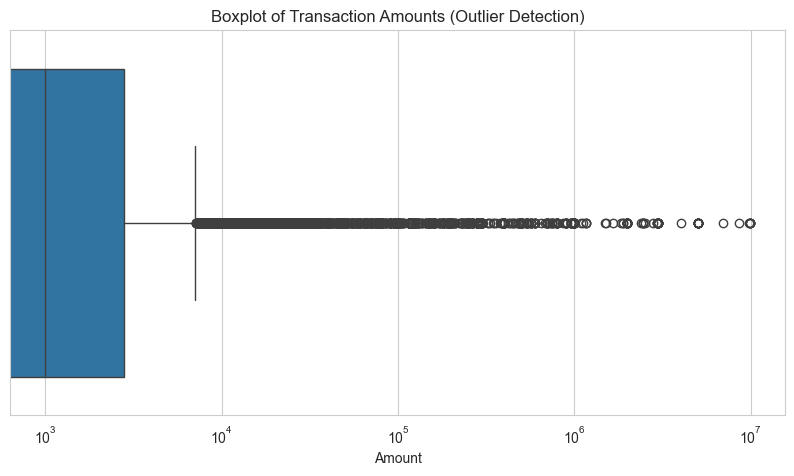

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amounts (Outlier Detection)')
plt.xscale('log') 
plt.show()

# Quantify Outliers using IQR

In [28]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR)))]
print(f"Number of outliers in Amount: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

Number of outliers in Amount: 24441
Percentage of outliers: 25.55%
